In [3]:
tf.compat.v1.losses.sparse_softmax_cross_entropy


<function tensorflow.python.ops.losses.losses_impl.sparse_softmax_cross_entropy(labels, logits, weights=1.0, scope=None, loss_collection='losses', reduction='weighted_sum_by_nonzero_weights')>

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [5]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [7]:
len(x_train)

60000

In [8]:
len(x_test)

10000

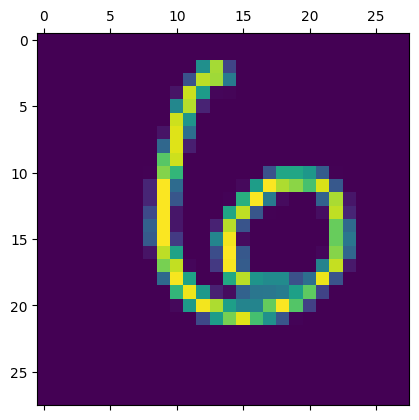

In [12]:
plt.matshow(x_test[100])

In [13]:
y_test[100]

6

In [22]:
x_train=x_train/255
x_test=x_test/255

In [23]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [24]:
x_train_flattened.shape

(60000, 784)

In [26]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(x_train_flattened,y_train,epochs=6)

Epoch 1/6


1875/1875 [==============================] - 5s 2ms/step - loss: 0.4671 - accuracy: 0.8770
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3033 - accuracy: 0.9158
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - accuracy: 0.9209
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9229
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9254
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2615 - accuracy: 0.9272


In [27]:
y_predicted=model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [28]:
y_predicted_final=[np.argmax(i) for i in y_predicted]

In [30]:
y_predicted_final[:5]

[7, 2, 1, 0, 4]

In [31]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

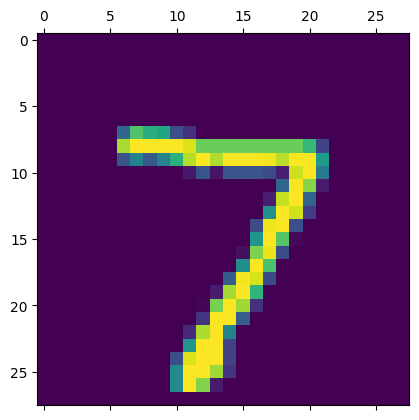

In [36]:
plt.matshow(x_test[0])

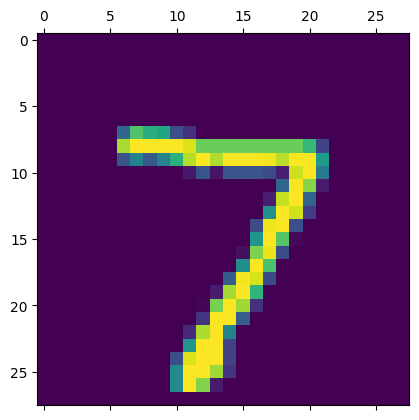

In [35]:
temp=x_test[0]
temp=temp*255
plt.matshow(temp)

In [37]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_final)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   9,   10,  914,   23,   12,    1,   13,   10,   37,    3],
       [   4,    0,   14,  937,    1,   17,    3,    9,   17,    8],
       [   2,    1,    5,    2,  931,    0,    6,    4,    9,   22],
       [  13,    3,    2,   47,   12,  755,   15,    7,   33,    5],
       [  15,    3,    3,    2,    7,    9,  914,    2,    3,    0],
       [   2,    9,   22,    9,   10,    0,    0,  938,    1,   37],
       [  13,   15,    6,   30,    9,   22,    9,   11,  850,    9],
       [  11,    8,    1,   13,   39,    5,    0,   18,    5,  909]])>

In [42]:
model_with_hidden=keras.Sequential([
    keras.layers.Dense(1000,input_shape=(784,),activation="relu"),
    keras.layers.Dense(100,input_shape=(784,),activation="softmax"),
    keras.layers.Dense(10,activation="sigmoid")
])
model_with_hidden.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model_with_hidden.fit(x_train_flattened,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 18s 9ms/step - loss: 1.4035 - accuracy: 0.5741
Epoch 2/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8536 - accuracy: 0.5973
Epoch 3/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5935 - accuracy: 0.7545
Epoch 4/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2757 - accuracy: 0.9301
Epoch 5/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1207 - accuracy: 0.9790
Epoch 6/6
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0860 - accuracy: 0.9833


In [43]:
model_with_hidden.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.1098 - accuracy: 0.9763


[0.1098283901810646, 0.9763000011444092]

In [45]:
y_predicted_with_hidden=model.predict(x_test_flattened)
y_predicted_hidden_final=[np.argmax(i) for i in y_predicted_with_hidden]
cm_with_hidden=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_hidden_final)
cm_with_hidden

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   9,   10,  914,   23,   12,    1,   13,   10,   37,    3],
       [   4,    0,   14,  937,    1,   17,    3,    9,   17,    8],
       [   2,    1,    5,    2,  931,    0,    6,    4,    9,   22],
       [  13,    3,    2,   47,   12,  755,   15,    7,   33,    5],
       [  15,    3,    3,    2,    7,    9,  914,    2,    3,    0],
       [   2,    9,   22,    9,   10,    0,    0,  938,    1,   37],
       [  13,   15,    6,   30,    9,   22,    9,   11,  850,    9],
       [  11,    8,    1,   13,   39,    5,    0,   18,    5,  909]])>

##### Here insted of creating flattened array each and every time we can use the default method

In [46]:
model_with_hiddenn=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(100,activation="softmax"),
    keras.layers.Dense(10,activation="sigmoid")
])
model_with_hiddenn.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model_with_hiddenn.fit(x_train,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 19s 9ms/step - loss: 1.4548 - accuracy: 0.4857
Epoch 2/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.9647 - accuracy: 0.5251
Epoch 3/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6844 - accuracy: 0.6612
Epoch 4/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4616 - accuracy: 0.7895
Epoch 5/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3672 - accuracy: 0.8088
Epoch 6/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1955 - accuracy: 0.9591
